In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
#| code-fold: false
# IMPORTING LIBRARIES
# --------------------

# AstroML
from astroML.datasets import fetch_LINEAR_sample
from astropy.coordinates import SkyCoord
import astropy.units as u

# Basic libraries
import pickle
import os
import sys
from tqdm import tqdm

# Plotting
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import ticker
import matplotlib.colors as mcolors
from matplotlib.font_manager import FontProperties

# DataFrame analysis
import pandas as pd

# Math libraries
import numpy as np
import scipy as sc
from scipy.stats import norm

# CONFIGURATION
# -------------
sns.set_theme(style='white') # setting the theme for plotting
sys.path.insert(0,'../src/')
np.random.seed(42)

# configuring plotting colors
colors = ['#465BBB', '#A82F43', '#3F8FCE', '#7ABBCE', '#3A3865', '#612A37', '#DC5433', '#F29457']
b1 = '#465BBB'
b2 = '#3F8FCE'
b3 = '#7ABBCE'
b4 = '#3A3865'
black1 = '#22212A'
black2 = '#2D1E21'
or1 = '#A82F43'
or2 = '#612A37'
or3 = '#DC5433'
or4 = '#F29457'
muted_colors = sns.set_palette(sns.color_palette(colors))

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams['text.latex.preamble'] = r'\usepackage{txfonts}'  # Use TX Times font

# Set up your font properties (optional)
font = FontProperties()
font.set_family('serif')
font.set_name('Times')  # Times font
%matplotlib inline 

In [3]:
#| code-fold: false
# Importing custom libraries
# ----------------------------
sys.path.insert(0,'../src/')
from BE_plotting import*
#from RR_lyrae_params import*
from blazhko_analysis import*

In [13]:
#| code-fold: false
# DATA
dataL = fetch_LINEAR_sample(data_home='../inputs') # fetching the data from astroML data library
end = 'ffinal'

# DATA from previous notebook
BE_STARS = pd.read_csv("../outputs/FINAL_BE_CATALOGUE.csv")
lc_analysis = pd.read_csv("../outputs/LC_ANALYSIS_"+end+".csv")
rrlyrae = pd.read_csv('../outputs/Lrrlyr_unprocessed.csv')
periodogr = pickle.load(open("../outputs/periodograms_"+end+".pkl", "rb"))
fits = np.load("../outputs/fits_"+end+".npy", allow_pickle=True)
ztf_data = np.load("../outputs/ztf_data_filter"+end+".npy", allow_pickle=True)

---

In [14]:
BE_STARS['dPn'] = round((BE_STARS['Plinear']-BE_STARS['Pztf'])/BE_STARS['Pmean'],5)
lc_analysis['dPn'] = round((lc_analysis['Plinear']-lc_analysis['Pztf'])/lc_analysis['Pmean'],5)


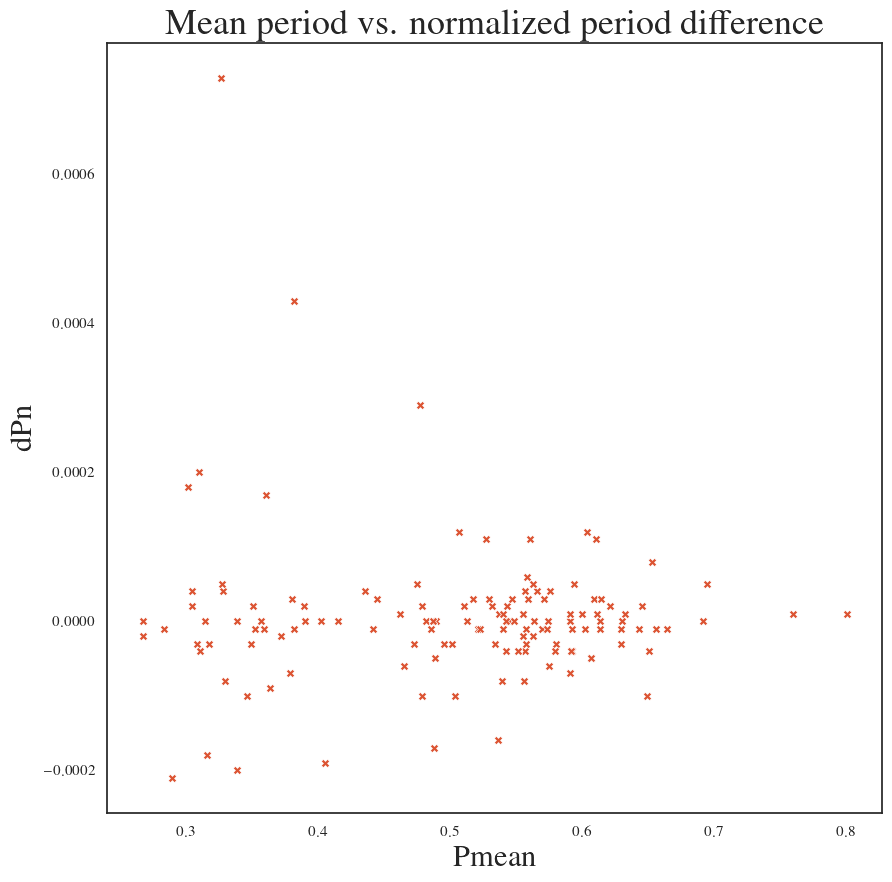

In [20]:
# TEST 1: the difference in period!

plt.figure(figsize=(10,10))

#sns.scatterplot(data=lc_analysis, x='Pmean', y='dPn', marker='.', color=b1)
sns.scatterplot(data=BE_STARS, x='Pmean', y='dPn', marker='X', color=or3)
#plt.xlim([0, 1.1])
#plt.ylim([0, 20])
plt.title('Mean period vs. normalized period difference', fontproperties=font,fontsize=26)
plt.xlabel('Pmean', fontproperties=font, fontsize=22)
plt.ylabel('dPn', fontproperties=font,fontsize=22)
#plt.savefig('../img_rsc/dp_scatter.png', dpi=150)
plt.show()

---
Selection of stars in a small pile for further analysis:

In [21]:
#...

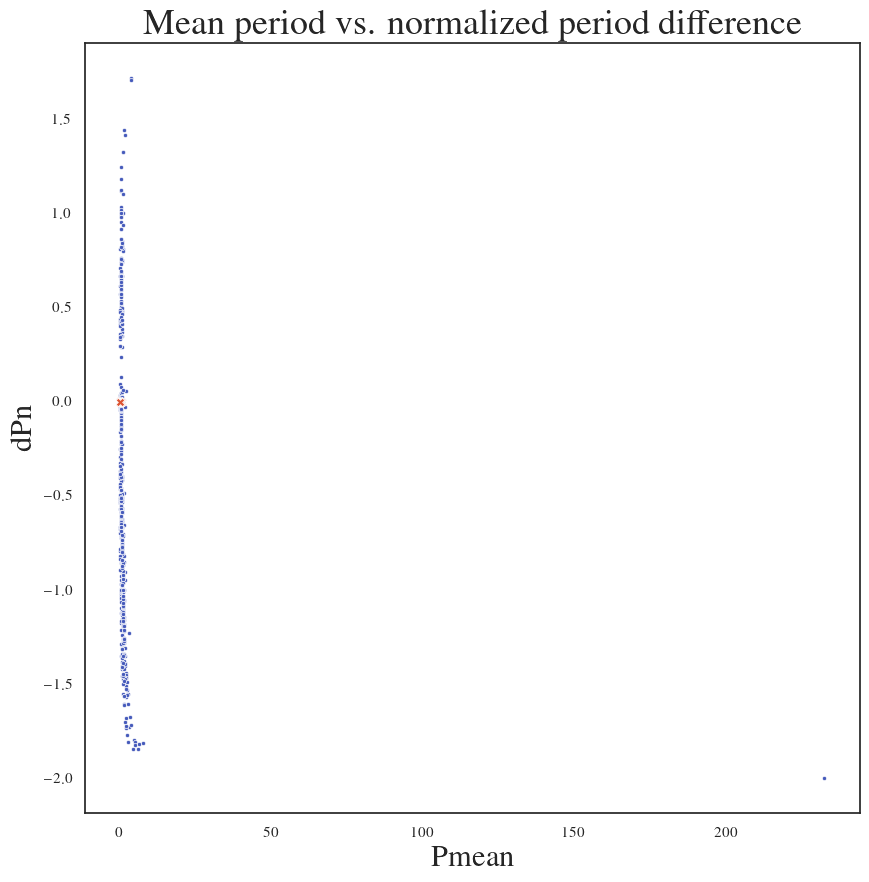

In [15]:
# TEST 1: the difference in period!

plt.figure(figsize=(10,10))

sns.scatterplot(data=lc_analysis, x='Pmean', y='dPn', marker='.', color=b1)
sns.scatterplot(data=BE_STARS, x='Pmean', y='dPn', marker='X', color=or3)
#plt.xlim([0, 1.1])
#plt.ylim([0, 20])
plt.title('Mean period vs. normalized period difference', fontproperties=font,fontsize=26)
plt.xlabel('Pmean', fontproperties=font, fontsize=22)
plt.ylabel('dPn', fontproperties=font,fontsize=22)
plt.savefig('../img_rsc/dp_scatter.png', dpi=150)
plt.show()

In [ ]:
# we can notice that there are values which are super extreme and unrealistic for RR Lyrae, 
# and it makes the whole graph look horrible, so we'll remove it.
remove = lc_analysis[lc_analysis['Pmean'] > 4].index
lc_analysis = lc_analysis.drop(remove)


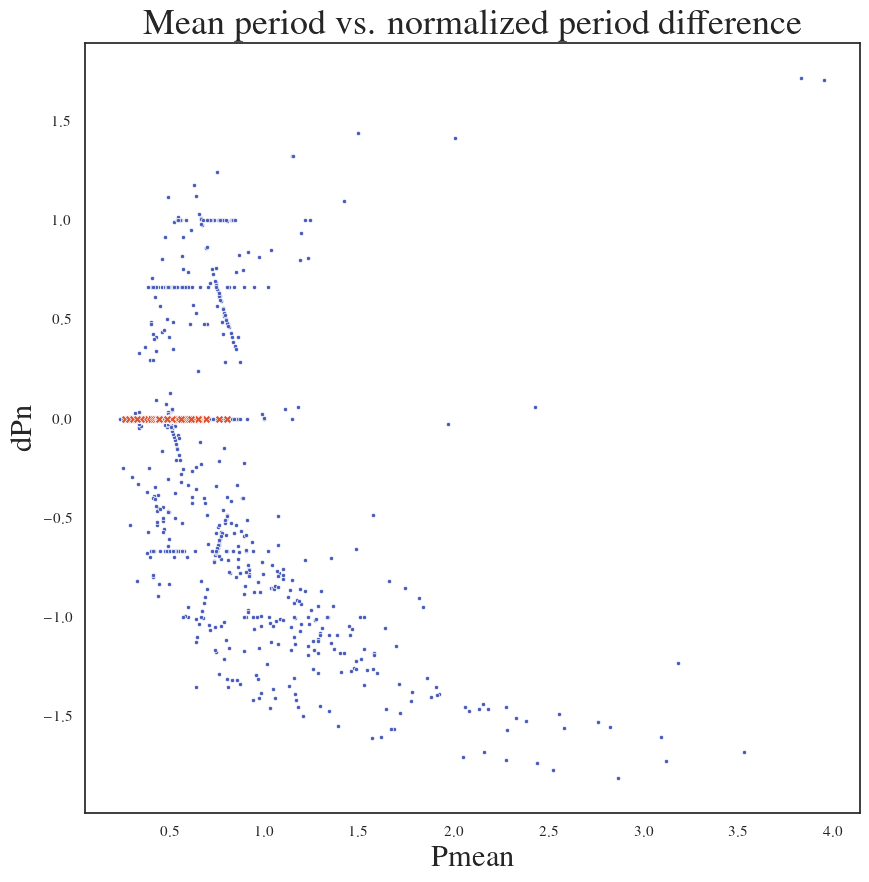

In [19]:
# TEST 1: the difference in period!

plt.figure(figsize=(10,10))

sns.scatterplot(data=lc_analysis, x='Pmean', y='dPn', marker='.', color=b1)
sns.scatterplot(data=BE_STARS, x='Pmean', y='dPn', marker='X', color=or3)
#plt.xlim([0, 1.1])
#plt.ylim([0, 20])
plt.title('Mean period vs. normalized period difference', fontproperties=font,fontsize=26)
plt.xlabel('Pmean', fontproperties=font, fontsize=22)
plt.ylabel('dPn', fontproperties=font,fontsize=22)
plt.savefig('../img_rsc/dp_scatter2.png', dpi=150)
plt.show()

---

In [ ]:
star1 = [4101289]
star2 = [6819457]
star3 = [7048826]
star4 = [10260828]

In [ ]:
single = category_analysis(BE_STARS, fits, periodogr, ztf_data, dataL, end='test',id_list=star3, plotSave=True)

In [ ]:
ID = 24
Lids = list(BE_STARS['LINEAR id'])

In [ ]:
total_num = len(Lids)
Lid = Lids[ID]
lc_data_ID = dataL.get_light_curve(Lid)
time, mag, magerr = lc_data_ID.T
tZ, mZ, meZ = ztf_data[ID][1], ztf_data[ID][2], ztf_data[ID][3]
for n, j in enumerate(fits):
    if j[0]==Lid:
        break

L1 = fits[n][1][0]
L2 = fits[n][1][2]

fig, ax = plt.subplots(1,4, figsize=(30,5))   
#fig.suptitle('STAR '+str(ID+1)+' from '+str(total_num), fontsize=30, fontproperties=font)
fig.set_facecolor('white')

#--------
ax[0].errorbar(time, mag, magerr, fmt='.k', ecolor=black1,lw=1, ms=4, capsize=1.5,alpha=0.2)
ax[0].set_xlabel('Time (days)',fontproperties=font)
ax[0].set_ylabel('Magnitude (mag)', fontproperties=font)
fig.suptitle('LINEAR object {0}'.format(Lid), fontproperties=font, fontsize=18)
ax[0].invert_yaxis()

# -----

ax[1].set_xlabel('fit LINEAR light curve (best period)', fontproperties=font, fontsize=12)
ax[1].set_ylabel('LINEAR normalized light curve', fontproperties=font, fontsize=12)
ax[1].set_xlim(-0.1, 1.1)
ax[1].set_ylim(1.3, -0.3)
# data
xx, yy, zz = sort3arr(L1['dataPhasedTime'], L1['dataTemplate'], L1['dataTemplateErr'])
ax[1].errorbar(xx, yy, zz, fmt='.k', ecolor=black1, lw=1, ms=4, capsize=1.5, alpha=0.2)
# fit for Plinear
ax[1].plot(L1['modelPhaseGrid'], L1['modTemplate'], or3, markeredgecolor=or3, lw=2, fillstyle='top', linestyle='dashed')

#--------
ax[2].errorbar(tZ, mZ, meZ, fmt='.k', ecolor=black1,lw=1, ms=4, capsize=1.5,alpha=0.2)
ax[2].set_xlabel('Time (days)',fontproperties=font)
ax[2].set_ylabel('Magnitude (mag)', fontproperties=font)
ax[2].invert_yaxis()

# -----

ax[3].set_xlabel('fit ZTF light curve (best period)', fontproperties=font, fontsize=12)
ax[3].set_ylabel('ZTF normalized light curve', fontproperties=font, fontsize=12)
ax[3].set_xlim(-0.1, 1.1)
ax[3].set_ylim(1.3, -0.3)
# data
xx, yy, zz = sort3arr(L2['dataPhasedTime'], L2['dataTemplate'], L2['dataTemplateErr'])
ax[3].errorbar(xx, yy, zz, fmt='.k', ecolor=black1, lw=1, ms=4, capsize=1.5, alpha=0.2)
# fit for Plinear
ax[3].plot(L2['modelPhaseGrid'], L2['modTemplate'], or3, markeredgecolor=or3, lw=2, fillstyle='top', linestyle='dashed')
#plt.tight_layout()
plt.savefig('../img_rsc/lc_pair.png', dpi=650)

---

In [ ]:
# CRTANJE SLIKA PO LISTI NEKIH ID-ova
# -------
ids = []
# -------
for i in tqdm(range(len(ids))):
    LID = ids[i]
    for n, j in enumerate(fits):
            if j[0]==LID:
                break

    # select light curve fits
    L1 = fits[n][1][0]
    L2 = fits[n][1][2]

    # select the periodogram data
    for o, k in enumerate(periodogr):
            if k[0]==LID:
                break

    fL = periodogr[o][1][0]
    pL = periodogr[o][1][1]
    fZ = periodogr[o][2][0]
    pZ = periodogr[o][2][1]

    

    fFoldedL = periodogr[o][1][2]
    pFoldedL = periodogr[o][1][3]
    fFoldedZ = periodogr[o][2][2]
    pFoldedZ = periodogr[o][2][3]

    # selecting ZTF data
    lc = dataL.get_light_curve(LID)
    tL = lc.T[0]
    for f, g in enumerate(ztf_data):
        if g[0] == LID:
            break
    tZ = ztf_data[f][1]
    # ---------------------
    plotAll(LID, n, i, len(Lids), L1, L2, BE_STARS, fL, pL, fZ, pZ, fFoldedL, fFoldedZ, pFoldedL, pFoldedZ, dataL, tL, tZ, ztf_data, plotSave=True)